## Introduction

The paper, **Detecting Heart Disease from Multi-View Ultrasound Images via Supervised Attention Multiple Instance Learning** addresses the significant challenge of diagnosing Aortic Stenosis (AS), a severe valve condition that causes considerable morbidity and mortality, from ultrasound images. Traditional methods for AS diagnosis involve expert review of echocardiography images, but this manual process is prone to under-diagnosis and under-treatment due to its dependence on expert availability and their subjective interpretation. The authors introduce a novel approach leveraging deep learning to automate AS screening, focusing on the ability of their model to mimic expert processes in identifying relevant views of the aortic valve across multiple ultrasound images to generate an accurate study-level diagnosis.

**Their contribution is twofold**: 

- First, they propose a new end-to-end Multiple Instance Learning (MIL) approach incorporating supervised attention, guiding the model to prioritize views relevant for AS diagnosis. This advancement addresses the limitations of previous models that either underperform due to inflexible averaging of images or lack the ability to differentiate between relevant and irrelevant views effectively. 

- Second, they introduce a self-supervised pretraining strategy focused on the entire study rather than individual images, enhancing the model's ability to understand complex patterns across multiple views. This method significantly improves upon the accuracy of AS detection, outperforming existing models while also achieving a reduction in model size, which facilitates easier deployment and application in clinical settings. Through extensive experiments using an open-access dataset and a temporally-external heldout set, the authors demonstrate the superiority of their approach in accurately diagnosing AS, thereby offering a promising tool for early screening and potentially improving patient outcomes by enabling timely treatment interventions.

*Original paper* [link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10923076/)

*Citation*

@article{huang2023detecting,
  title={Detecting Heart Disease from Multi-View Ultrasound Images via Supervised Attention Multiple Instance Learning},
  author={Huang, Zhe and Wessler, Benjamin S and Hughes, Michael C},
  journal={arXiv preprint arXiv:2306.00003},
  year={2023}
}



## Scope of Reproducibily

The paper sets a high benchmark for reproducibility in computational healthcare research, especially in the domain of diagnosing heart diseases using ultrasound images. The scope of reproducibility encompasses several critical aspects. Firstly, the authors have made their code publicly available, which is a significant step towards enabling other researchers to replicate their findings, understand the nuances of their methodology, and extend the work further. This openness in sharing code ensures that the novel supervised attention multiple instance learning (MIL) approach and the self-supervised pretraining strategy can be thoroughly examined, critiqued, and built upon.

Secondly, the utilization of an open-access dataset for training and validating the model underlines the paper's commitment to reproducibility. By relying on publicly available data, the authors ensure that others can replicate their experimental setup without encountering data access barriers. This approach also allows for the evaluation of the model's effectiveness across different datasets, which is crucial for assessing its generalizability and potential applicability in various clinical settings.

Lastly, the detailed documentation of the methodology, from the formulation of the problem to the implementation of the MIL approach and the pretraining strategy, provides a clear roadmap for replication. The authors’ comprehensive descriptions of their experiments, including model parameters and evaluation metrics, further aid in reproducing the research outcomes.

*While the aforementioned statements hold true, our reproducibility efforts will prioritize two main objectives. Firstly, we aim to transform extensive Python code bases into functional notebooks, with a particular emphasis on streamlining the process. Secondly, we intend to execute successful training procedures for DSMIL, ABMIL, and SAMIL, followed by performance evaluations. Despite the considerable size of the data, we are endeavoring to conduct these tasks locally using a CUDA-powered GPU machine. Our previous attempts utilizing Colab and Drive connections yielded suboptimal performance. Depending on the time required to execute all simulations, we will adjust the dataset accordingly and present the final outcomes.*

## Dataset descriptions

The TMED dataset comprises transthoracic echocardiogram (TTE) imagery collected from routine care procedures adhering to American Society of Echocardiography (ASE) guidelines, spanning the period from 2011 to 2020 at Tufts Medical Center. During echocardiogram acquisition, a sonographer maneuvers a handheld transducer across the patient's chest, selecting various acquisition angles to comprehensively assess the intricate anatomy of the heart. This process yields multiple cineloop video clips showcasing different anatomical views of the heart. From each clip, author extracted a single still image, resulting in multiple images per patient study (typically 50-100 images). While neither view nor diagnostic labels are initially recorded during routine care, diagnostic labels, such as those for aortic stenosis (AS), are assigned by expert clinicians hours or days post-study, based on comprehensive review of the acquired videos and images. These labels are later incorporated into the patient's electronic medical record, making extraction into a machine-readable format challenging. To address this, significant annotation efforts were undertaken to assign view labels to a subset of the data, while diagnostic labels were manually extracted from existing medical records by board-certified cardiologists.

#### TMED2 Specific information

complete TMED-2 dataset release (dated 2022-07-12) contains three components:

* view_and_diagnosis_labeled_set : 599 studies from 577 unique patients (some patients have multiple studies on distinct days).

  - All patients have an aortic stenosis (AS) diagnostic label (none, early AS, or significant AS; for more see our severity diagnosis label primer)

  - Some images from each study have view label annotations (one of PLAX/PSAX/A2C/A4C/other, for more see our view label primer)

  - We partition these by patient into different "splits" of 360 training / 119 validation / 120 test studies.

* view_labeled_set : 705 studies from 703 unique patients 
  - These studies have view labels, but no AS diagnosis labels

* unlabeled_set : 5486 studies from 5287 patients



Summary statistics of latest released TMED-2 dataset

<table>
  <thead>
    <tr>
      <th style="background-color: #E55616;">Dataset</th>
      <th style="background-color: #E9672E;">Num. Patients</th>
      <th style="background-color: #E9672E;">Num. Studies</th>
      <th style="background-color: #E9672E;">Num. Labeled Images</th>
      <th style="background-color: #E9672E;">Num. Unlabeled Images</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>fully labeled set</td>
      <td>577</td>
      <td>599</td>
      <td>17270</td>
      <td>26596</td>
    </tr>
    <tr>
      <td>partially labeled set</td>
      <td>703</td>
      <td>705</td>
      <td>7694</td>
      <td>37576</td>
    </tr>
    <tr>
      <td>unlabeled set</td>
      <td>5287</td>
      <td>5486</td>
      <td>0</td>
      <td>353500</td>
    </tr>
  </tbody>
</table>

##### Dataset format

Every image in this dataset is a 2D TTE image stored at 112x112 pixel resolution in PNG format.

The top-level directory contains:

- labels, stored in comma-separated-value (CSV) plain-text files
- images, stored within folders as 112x112 pixel grayscale PNG files

Images are stored within a hierarchy of folders representing the sets that comprise TMED-2:

- <span style="color:#E32144">view_and_diagnosis_labeled_set/labeled/</span>
- <span style="color:#E32144">view_and_diagnosis_labeled_set/unlabeled/</span>
- <span style="color:#E32144">view_labeled_set/labeled/</span>
- <span style="color:#E32144">view_labeled_set/unlabeled/</span>
- <span style="color:#E32144">unlabeled_set/unlabeled/</span>


Each set's labeled/ subfolder contains only images with view labels. Each set's unlabeled/ subfolder contains only images without any view labels.

The individual image files are stored as 112x112 pixel grayscale PNG files within the appropriate folder.

For example, the fully-labeled set looks like:

- view_and_diagnosis_labeled_set/labeled/2977s1_0.png
- view_and_diagnosis_labeled_set/labeled/2977s1_1.png
- view_and_diagnosis_labeled_set/labeled/2977s1_2.png

- view_and_diagnosis_labeled_set/labeled/2977s1_19.png
- view_and_diagnosis_labeled_set/labeled/1907s2_0.png
- view_and_diagnosis_labeled_set/labeled/1907s2_1.png
- view_and_diagnosis_labeled_set/labeled/1907s2_2.png

- view_and_diagnosis_labeled_set/labeled/1907s2_24.png

The naming convention of these files is <span style="color:#E32144">[PatientID]s[StudyID]_[ImageID].png</span>

PatientIDs are unique random identifiers (consistent across the whole dataset)
Each StudyID (counting up from 1) indicates one session of echocardiogram imagery captured on one day.
Each ImageID (counting up from 0) distinguishes each image within a subset. ImageID is not unique across even the labeled/ and unlabeled/ image sets, so please use the full path if you need a unique identifier.


> *Please be advised that as per the authors' instructions, we are required to utilize their provided data information, which includes train, test, and validation sets, along with a summary table. Specifically, for TMED2, we are to utilize the folder named "view_and_diagnosis_labeled_set". We will adhere to these guidelines accordingly. 


>You can download the necessary data folders for the experiment from the provided box [link](https://uofi.box.com/s/g5dgfour7684re3afs8ohvqyxax2zgdr) and all the codes can be cloned from thik [git_link](https://github.com/DiptamGit/cs-598-final-project-samil) Subsequent sections will include some basic visualizations. To execute the visualization code, please ensure that you have downloaded and all the stored folders, "data_info" and "view_and_diagnosis_labeled_set" and model_checkpoints, in the same directory as your notebook. "view_and_diagnosis_labeled_set" will have two zip files inside, please unzip them in same location,This placement will also suffice for the modeling sections; hence, we will not include a separate section prior to that. All pip installation information are kept as requirment.txt, However, we will include a helpful folder hierarchy to ensure organizational coherence.*



***** Before attempting below codes, please make sure you directory looks like this *****

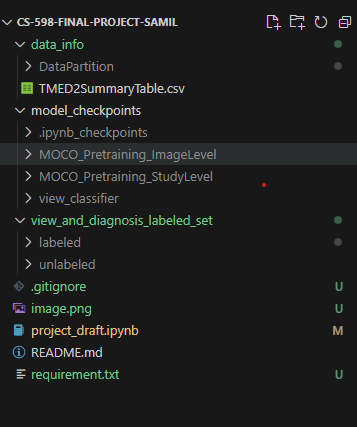



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import random
import PIL.Image as Image

#### Author provided TMED2 Summary Table Visualization

In [3]:
auther_data_summary = pd.read_csv("SAMIL/data_info/TMED2SummaryTable.csv")

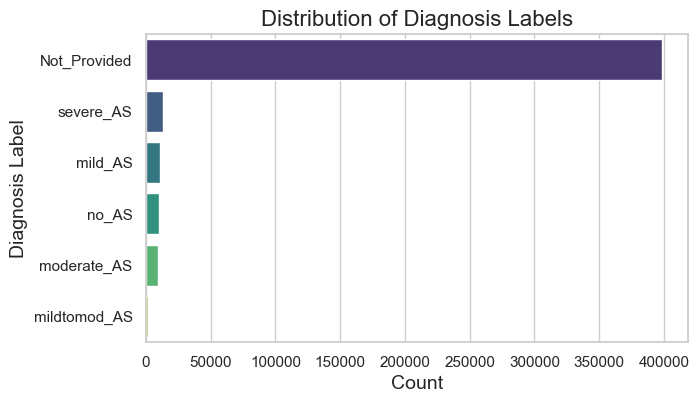

In [5]:
sns.set_theme(style="whitegrid")

diagnosis_counts = auther_data_summary['diagnosis_label'].value_counts()

plt.figure(figsize=(7, 4))
sns.barplot(x=diagnosis_counts.values, y=diagnosis_counts.index, hue=diagnosis_counts.index, palette="viridis", legend=False)
plt.title('Distribution of Diagnosis Labels', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Diagnosis Label', fontsize=14)
plt.show()





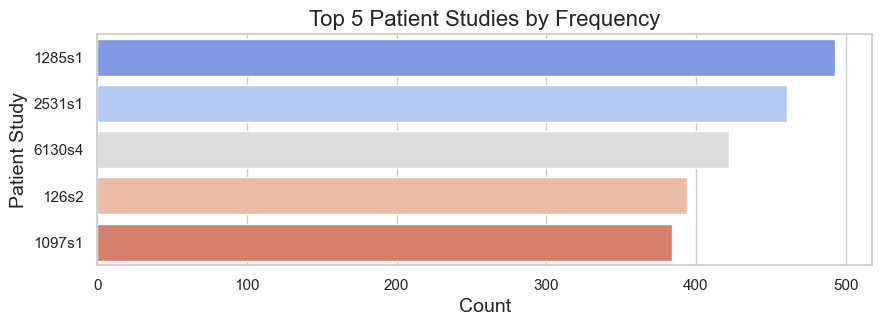

In [6]:
sns.set_theme(style="whitegrid")

study_counts = auther_data_summary['patient_study'].value_counts().head(5)

plt.figure(figsize=(10, 3))
sns.barplot(x=study_counts.values, y=study_counts.index, hue=study_counts.index, palette="coolwarm", legend=False)
plt.title('Top 5 Patient Studies by Frequency', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Patient Study', fontsize=14)
plt.show()



#### TMED2 Image label Visualization from original dataset

In [8]:
tmed2_label_per_image = pd.read_csv('SAMIL/data_info/labels_per_image.csv')

tmed2_label_per_image


,query_key,view_label,diagnosis_label
0,4860s1_0.png,A4C,moderate_AS
1,4860s1_1.png,A2C,moderate_AS
2,4860s1_2.png,PLAX,moderate_AS
3,4860s1_3.png,PLAX,moderate_AS
4,4860s1_4.png,PLAX,moderate_AS
...,...,...,...
24959,2797s1_28.png,A4C,Not_Provided
24960,235s1_0.png,PLAX,Not_Provided
24961,235s1_1.png,A4C,Not_Provided
24962,235s1_2.png,PLAX,Not_Provided


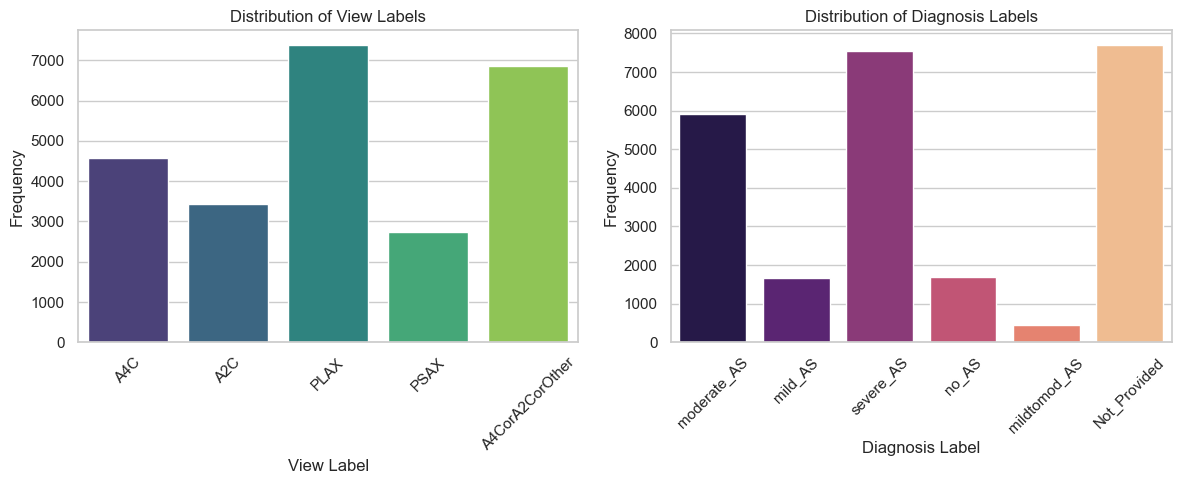

In [9]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=tmed2_label_per_image, x='view_label', hue='view_label', ax=ax[0], palette='viridis', dodge=False, legend=False)
ax[0].set_title('Distribution of View Labels')
ax[0].set_xlabel('View Label')
ax[0].set_ylabel('Frequency')

sns.countplot(data=tmed2_label_per_image, x='diagnosis_label', hue='diagnosis_label', ax=ax[1], palette='magma', dodge=False, legend=False)
ax[1].set_title('Distribution of Diagnosis Labels')
ax[1].set_xlabel('Diagnosis Label')
ax[1].set_ylabel('Frequency')

for axis in ax:
    for label in axis.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()


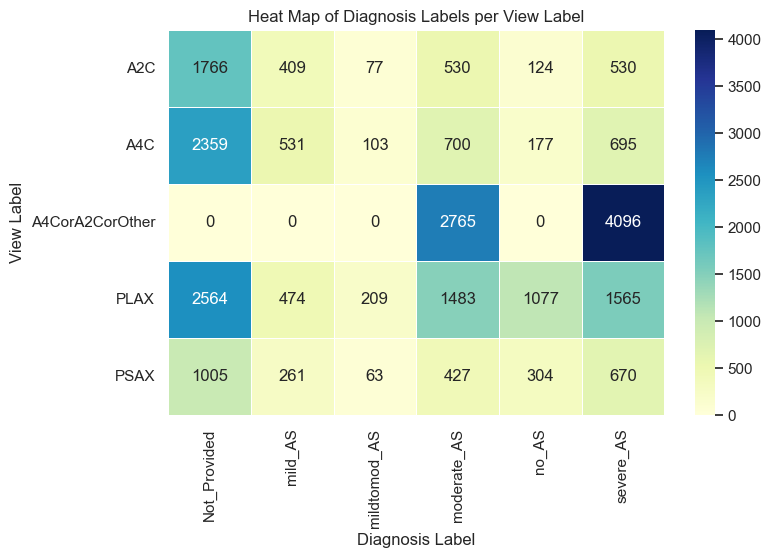

In [10]:
pivot_table_data = pd.crosstab(tmed2_label_per_image['view_label'], tmed2_label_per_image['diagnosis_label'])

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Heat Map of Diagnosis Labels per View Label')
plt.xlabel('Diagnosis Label')
plt.ylabel('View Label')
plt.show()


#### Image visualization from view_and_diagnosis_labeled_set

In [11]:
labels_per_image_csv = pd.read_csv('SAMIL/data_info/labels_per_image.csv')

In [12]:
def find_label(query_key):
    assert len(labels_per_image_csv.index[labels_per_image_csv['query_key']==query_key].tolist())==1

    row_id = labels_per_image_csv.index[labels_per_image_csv['query_key']==query_key].tolist()[0]
    view_label = labels_per_image_csv.iloc[row_id].view_label
    diagnosis_label = labels_per_image_csv.iloc[row_id].diagnosis_label
    
    return view_label, diagnosis_label

def LoadImage(file_path):
    im = Image.open(file_path)
    im = np.asarray(im)/255
    return im

def ShowGrayscaleImage(file_path, title='', ax=None):
    print(file_path)
    im = LoadImage(file_path)
    if ax is None:
        plt.figure()
    plt.axis('off')
    
    plt.imshow(im , cmap=plt.cm.gray, vmin=0, vmax=1) #im is of float, 0-1

    plt.title(title)

In [13]:

view_and_diagnosis_labeled_set_path = os.path.join("C:/Users/dipta/OneDrive/Documents/MCS/dlh/Project/SAMIL/view_and_diagnosis_labeled_set", 'labeled')
labeled_dir = os.listdir(view_and_diagnosis_labeled_set_path)
print('number of images in the ImageList_view_and_diagnosis_labeledset: {}'.format(len(labeled_dir)))

number of images in the ImageList_view_and_diagnosis_labeledset: 17270


Currently visualizing 3436s1_25.png from labeled set
view: PLAX, diagnosis: moderate_AS
C:/Users/dipta/OneDrive/Documents/MCS/dlh/Project/SAMIL/view_and_diagnosis_labeled_set\labeled\3436s1_25.png


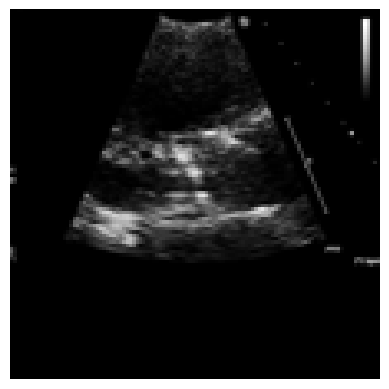

In [16]:
im_to_visualize = random.choice(labeled_dir)
view_label, diagnosis_label = find_label(im_to_visualize)

print('Currently visualizing {} from labeled set'.format(im_to_visualize))
print('view: {}, diagnosis: {}'.format(view_label, diagnosis_label))

ShowGrayscaleImage(os.path.join(view_and_diagnosis_labeled_set_path, im_to_visualize))

#### Model 

1. **Problem Formulation**: The task is to classify echocardiogram studies, each comprising multiple 2D ultrasound images, by severity levels of AS. The studies are represented as bags of images with each image being a 112x112 pixel grayscale frame. Diagnostic labels for these studies vary from no AS to significant AS.

2. **General MIL Architecture**: The model architecture consists of three main components:
   - **Instance Representation Layer**: Transforms each image into a feature representation using a stack of convolution layers and a multi-layer perceptron (MLP).
   - **Pooling Layer**: Aggregates features across images using an attention-weighted average to form a bag-level representation. This layer uses trainable parameters to focus on relevant features.
   - **Output Layer**: Maps the bag-level representation to a probabilistic classification of AS severity through a linear-softmax transformation.

3. **Innovations**:
   - **Supervised Attention Module**: Enhances the MIL pooling layer to focus more effectively on clinically relevant views within an echocardiogram.
   - **Study-Level Contrastive Learning**: Improves representation of entire studies, not just individual images, by contrasting the learned features of different classes to fine-tune the model's sensitivity to variations in AS severity.

4. **Training and Prediction**: The model is trained using a cross-entropy loss function to minimize the error between observed and predicted AS severity. This involves adjusting the parameters of both the representation and pooling layers, as well as the output layer, to optimize the model's predictive accuracy.

This comprehensive approach leverages deep learning and multiple instance learning to enhance the diagnostic capabilities of echocardiograms for aortic stenosis, focusing on both individual image details and holistic study characteristics.

According to authors,

In the development of the Supervised Attention Multiple Instance Learning (SAMIL) network for diagnosing aortic stenosis (AS), the process is divided into two crucial stages to maximize diagnostic accuracy. 

**Stage 1** involves self-supervised pretraining using the TMED-2 dataset. This initial phase employs a bag-level pretraining strategy that leverages both labeled and a substantial volume of unlabeled data, encompassing over 350,000 images. This broad dataset enables the model to learn a comprehensive representation of study-level features without the need for direct supervision. Once pretraining is complete, the projection head ψq is removed, and the remaining parameters (σq and fq) are preserved. These are used to warm-start the subsequent supervised phase, ensuring that the model transitions smoothly from a broadly trained base into a more focused training regime.

**Stage 2** involves fine-tuning the pretrained components (f and σ) along with the output layer g, utilizing the complete and detailed studies from TMED-2’s labeled training set. The goal in this stage is to refine the model's ability to specifically diagnose AS by focusing the training on the relevant clinical features across all available images, irrespective of their initial view label. This approach aims to minimize the overall loss, thereby enhancing the model's diagnostic precision and reliability in clinical settings. This structured training strategy ensures the model is both robust and sensitive to the nuances of varied echocardiographic data, positioning it as a potent tool in the detection of heart disease.

> From this point forward, we will begin presenting all the models and training code. Please note that we are currently in the process of converting and reorganizing the original code into an IPython Notebook format. The initial code was provided in large blocks of Python files, which we are now restructuring. Additionally, we have encountered some challenges in making the training dataset portion of the code operational. This issue stems from the code referencing a class called `EchoDataSet`, which was originally designed to create bags from TIFF files stored in individual folders. We are actively working to modify this code to accommodate PNG files from the provided dataset. Consequently, the code beyond this point may not yet be functional, as these adjustments are still underway.

In [5]:
# imports

import argparse
import logging
import math
import os
import random
import shutil
import time
import json
from tqdm import tqdm

import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import LambdaLR
from torch.utils.data import DataLoader
from torchvision import transforms

from torch.utils.tensorboard import SummaryWriter

from SAMIL.src.SAMIL.libml.Echo_data import EchoDataset

from SAMIL.src.SAMIL.libml.utils import save_pickle
from SAMIL.src.SAMIL.libml.utils import train_one_epoch, eval_model
from SAMIL.src.SAMIL.libml.utils import EarlyStopping

from SAMIL.src.SAMIL.libml.models.ema import ModelEMA
from SAMIL.src.SAMIL.libml.randaugment import RandAugmentMC


In [6]:
from types import SimpleNamespace

arguments = {
    "dataset_name": "echo",
    "data_seed": 0,
    "development_size": "DEV479",
    "training_seed": 0,
    "sampling_strategy": "first_frame",
    "train_epoch": 1,
    "start_epoch": 0,
    "eval_every_Xepoch": 1,
    "Pretrained": "Whole",
    "resume": "last_checkpoint.pth.tar",
    "resume_checkpoint_fullpath": "",
    "train_dir": "SAMIL/experiments/SAMIL/Pretrained-Whole/data_seed0/training_seed0/DEV479/",
    "data_info_dir": "SAMIL/data_info",
    "data_dir": "C:/Users/dipta/OneDrive/Documents/MCS/dlh/Project/SAMIL/view_and_diagnosis_labeled_set",
    "checkpoint_dir": "SAMIL/model_checkpoints",
    "train_PatientStudy_list_path": "SAMIL/data_info/DataPartition/seed0/DEV479/FullyLabeledSet_studies/train_studies.csv",
    "val_PatientStudy_list_path": "SAMIL/data_info/DataPartition/seed0/DEV479/FullyLabeledSet_studies/val_studies.csv",
    "test_PatientStudy_list_path": "SAMIL/data_info/DataPartition/seed0/DEV479/FullyLabeledSet_studies/test_studies.csv",
    "lr": 0.00005,
    "lr_warmup_epochs": 0,
    "lr_schedule_type": "CosineLR",
    "lr_cycle_epochs": 3,
    "wd": 0.0001,
    "optimizer_type": "SGD",
    "nesterov": "True",
    "ema_decay": 0.999,
    "num_classes": 3,
    "batch_size": 1,
    "num_workers": 8,
    "patience": 200,
    "early_stopping_warmup": 200,
    "T": 0.03,
    "lambda_ViewRegularization": 5,
    "view_checkpoint_path": "",
    "ViewRegularization_warmup_pos": 0.4,
    "ViewRegularization_warmup_schedule_type": "Linear",
    "use_class_weights": "True",
    "class_weights": "0.25,0.25,0.25",
    "augmentation": "RandAug",
    "use_data_normalization": "False",
    "device": "device(type='cuda')"
}
arguments = SimpleNamespace(**arguments)

# Now you can access the dictionary items using dot notation
print(arguments)



namespace(dataset_name='echo', data_seed=0, development_size='DEV479', training_seed=0, sampling_strategy='first_frame', train_epoch=1, start_epoch=0, eval_every_Xepoch=1, Pretrained='Whole', resume='last_checkpoint.pth.tar', resume_checkpoint_fullpath='', train_dir='SAMIL/experiments/SAMIL/Pretrained-Whole/data_seed0/training_seed0/DEV479/', data_info_dir='SAMIL/data_info', data_dir='C:/Users/dipta/OneDrive/Documents/MCS/dlh/Project/SAMIL/view_and_diagnosis_labeled_set', checkpoint_dir='SAMIL/model_checkpoints', train_PatientStudy_list_path='SAMIL/data_info/DataPartition/seed0/DEV479/FullyLabeledSet_studies/train_studies.csv', val_PatientStudy_list_path='SAMIL/data_info/DataPartition/seed0/DEV479/FullyLabeledSet_studies/val_studies.csv', test_PatientStudy_list_path='SAMIL/data_info/DataPartition/seed0/DEV479/FullyLabeledSet_studies/test_studies.csv', lr=5e-05, lr_warmup_epochs=0, lr_schedule_type='CosineLR', lr_cycle_epochs=3, wd=0.0001, optimizer_type='SGD', nesterov='True', ema_deca

In [7]:
# check if cuda is available
cuda = torch.cuda.is_available()

if cuda:
    print('cuda available')
    device = torch.device('cuda')
    arguments.device = device
    torch.backends.cudnn.benchmark = True
else:
    raise ValueError('Not Using GPU?')

arguments.device

cuda available


device(type='cuda')

In [8]:
# logger config
logger = logging.getLogger(__name__)
logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO)

In [9]:
#setting seed

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    
if arguments.training_seed is not None:
    print('setting training seed{}'.format(arguments.training_seed), flush=True)
    set_seed(arguments.training_seed)

setting training seed0


In [10]:
# Setting pretrained type

if arguments.Pretrained == 'Whole':
    if arguments.data_seed==0:
          arguments.MIL_checkpoint_path = os.path.join(arguments.checkpoint_dir,'MOCO_Pretraining_StudyLevel', 'seed0_checkpoint.pt')
    elif arguments.data_seed==1:
          arguments.MIL_checkpoint_path = os.path.join(arguments.checkpoint_dir,'MOCO_Pretraining_StudyLevel', 'seed1_checkpoint.pt')
    elif arguments.data_seed==2:
          arguments.MIL_checkpoint_path = os.path.join(arguments.checkpoint_dir,'MOCO_Pretraining_StudyLevel', 'seed2_checkpoint.pt')
    else:
         raise NameError('NOT VALID PRETRAINED MODEL')
    
elif arguments.Pretrained == 'FeatureExtractor1':
     if arguments.data_seed==0:
          arguments.MIL_checkpoint_path=os.path.join(arguments.checkpoint_dir, 'MOCO_Pretraining_ImageLevel', 'seed0_checkpoint.pt')
     elif arguments.data_seed==1:
          arguments.MIL_checkpoint_path=os.path.join(arguments.checkpoint_dir, 'MOCO_Pretraining_ImageLevel', 'seed1_checkpoint.pt')
     elif arguments.data_seed==2:
          arguments.MIL_checkpoint_path=os.path.join(arguments.checkpoint_dir, 'MOCO_Pretraining_ImageLevel', 'seed2_checkpoint.pt')
     else:
          raise NameError('NOT VALID PRETRAINED MODEL')
     
elif arguments.Pretrained == 'NoPretrain':
     arguments.MIL_checkpoint_path=''
else:
     raise NameError('invalid pretrain option')


In [11]:
if arguments.use_class_weights == 'True':
        print('Pre calculated class weights has been set')
        
        #indeed, every split should have the same class weight for diagnosis by our dataset construction
        if arguments.data_seed == 0 and arguments.development_size == 'DEV479':
            arguments.class_weights = '0.463,0.342,0.195'
        elif arguments.data_seed == 1 and arguments.development_size == 'DEV479':
            arguments.class_weights = '0.463,0.342,0.195'
        elif arguments.data_seed == 2 and arguments.development_size == 'DEV479':
            arguments.class_weights = '0.463,0.342,0.195'
        else:
            raise NameError('not valid class weights setting')
    
else:
    arguments.class_weights = '1.0,1.0,1.0'
    print('?????????Not using pre-calculated class weights?????????')

Pre calculated class weights has been set


In [12]:
experiment_name = "ViewRegularization_warmup-{}_Optimizer-{}_LrSchedule-{}_LrCycleEpochs-{}_lr-{}_wd-{}_T-{}_lambdaViewRegularization-{}".format(arguments.ViewRegularization_warmup_schedule_type, arguments.optimizer_type, arguments.lr_schedule_type, arguments.lr_cycle_epochs, arguments.lr, arguments.wd, arguments.T, arguments.lambda_ViewRegularization)

In [13]:
arguments.experiment_dir = os.path.join(arguments.train_dir, experiment_name)
print('experiment_dir : ', arguments.experiment_dir) 

experiment_dir :  SAMIL/experiments/SAMIL/Pretrained-Whole/data_seed0/training_seed0/DEV479/ViewRegularization_warmup-Linear_Optimizer-SGD_LrSchedule-CosineLR_LrCycleEpochs-3_lr-5e-05_wd-0.0001_T-0.03_lambdaViewRegularization-5


In [15]:
if arguments.resume != 'None':
    arguments.resume_checkpoint_fullpath = os.path.join(arguments.experiment_dir, arguments.resume)
else:
    arguments.resume_checkpoint_fullpath = None

In [16]:
if arguments.resume != 'None':
    arguments.resume_checkpoint_fullpath = os.path.join(arguments.experiment_dir, arguments.resume)
else:
    arguments.resume_checkpoint_fullpath = None

In [17]:
os.makedirs(arguments.experiment_dir, exist_ok=True)
arguments.writer = SummaryWriter(arguments.experiment_dir)

In [18]:
# util methods 
def str2bool(s):
    if s == 'True':
        return True
    elif s == 'False':
        return False
    else:
        raise NameError('Bad string')
    

def save_checkpoint(state, checkpoint_dir, filename='last_checkpoint.pth.tar'):
    '''last_checkpoint.pth.tar or xxx_model_best.pth.tar'''
    
    filepath = os.path.join(checkpoint_dir, filename)
    torch.save(state, filepath)

In [19]:
#warmup 
def get_cosine_schedule_with_warmup(optimizer,
                                    lr_warmup_epochs,
                                    lr_cycle_epochs, #total train epochs
                                    num_cycles=7./16.,
                                    last_epoch=-1):
    def _lr_lambda(current_epoch):
        if current_epoch < lr_warmup_epochs:
            return float(current_epoch) / float(max(1, lr_warmup_epochs))
#         no_progress = float(current_epoch - lr_warmup_epochs) / \
#             float(max(1, float(lr_cycle_epochs) - lr_warmup_epochs))

        #see if using restart
        ###############################################################
        if current_epoch%lr_cycle_epochs==0: 
            current_cycle_epoch=lr_cycle_epochs
        else:
            current_cycle_epoch = current_epoch%lr_cycle_epochs
        
        no_progress = float(current_cycle_epoch - lr_warmup_epochs) / \
            float(max(1, float(lr_cycle_epochs) - lr_warmup_epochs))
        #################################################################
        
        return max(0., math.cos(math.pi * num_cycles * no_progress))

    return LambdaLR(optimizer, _lr_lambda, last_epoch)

In [20]:
def get_fixed_lr(optimizer,
                lr_warmup_epochs,
                lr_cycle_epochs, #total train iterations
                num_cycles=7./16.,
                last_epoch=-1):
    def _lr_lambda(current_epoch):
        
        return 1.0

    return LambdaLR(optimizer, _lr_lambda, last_epoch)

In [21]:
def create_view_model(args):
    
    import SAMIL.src.SAMIL.libml.models.view_classifier as view_models
    
    view_model = view_models.build_wideresnet(depth=28,
                                        widen_factor=2,
                                        dropout=0.0,
                                        num_classes=3)
    
    logger.info("Total params for View Model: {:.2f}M".format(
        sum(p.numel() for p in view_model.parameters())/1e6))
    
    
    #load the saved checkpoint
    if args.data_seed==0:
        args.view_checkpoint_path = os.path.join(args.checkpoint_dir, 'view_classifier', 'seed0_model_best.pth.tar')
    elif args.data_seed==1:
        args.view_checkpoint_path = os.path.join(args.checkpoint_dir, 'view_classifier', 'seed1_model_best.pth.tar')
    elif args.data_seed==2:
        args.view_checkpoint_path = os.path.join(args.checkpoint_dir, 'view_classifier', 'seed2_model_best.pth.tar')
    else:
        raise NameError('?')
    
        
    view_checkpoint = torch.load(args.view_checkpoint_path)

    view_model.load_state_dict(view_checkpoint['ema_state_dict'])
    
    view_model.eval()
    
    return view_model

In [22]:
def create_model(args):
    
    from SAMIL.src.SAMIL.libml.models.model import SAMIL
    model = SAMIL()

    if args.MIL_checkpoint_path !='':
        print('!!!!!!!!!!!!!!!!!!!!!initializing from pretrained checkpoint!!!!!!!!!!!!!!!!!!!!!')
        pretrained_dict = torch.load(args.MIL_checkpoint_path)

        #https://discuss.pytorch.org/t/dataparallel-changes-parameter-names-issue-with-load-state-dict/60211
        #rename tensor in the pretrained dict
        from collections import OrderedDict
        new_state_dict = OrderedDict()
        for k, v in pretrained_dict.items():
#                         print(k)
            if 'encoder_q' in k:
#                             print('!extract: {}'.format(k))
                name = '.'.join(k.split('.')[1:])
#                             print('new_name: {}'.format(name))
                new_state_dict[name] = v

        model_dict = model.state_dict() 

        new_state_dict = {k: v for k, v in new_state_dict.items() if k in model_dict}
        model_dict.update(new_state_dict)

        # 3. load the new state dict
        model.load_state_dict(model_dict)

                    
        
    logger.info("Total params: {:.2f}M".format(
        sum(p.numel() for p in model.parameters() if p.requires_grad)/1e6))
    
    return model

In [23]:
arguments.use_data_normalization = str2bool(str(arguments.use_data_normalization))
    
TMED2SummaryTable = pd.read_csv(os.path.join(arguments.data_info_dir, 'TMED2SummaryTable.csv'))
    
echo_mean = [0.059, 0.059, 0.059]
echo_std = [0.138, 0.138, 0.138]

In [24]:
TMED2SummaryTable

,patient_study,diagnosis_label
0,2142s1,no_AS
1,2142s1,no_AS
2,2142s1,no_AS
3,2142s1,no_AS
4,2142s1,no_AS
...,...,...
443802,20s2,Not_Provided
443803,20s2,Not_Provided
443804,20s2,Not_Provided
443805,20s2,Not_Provided


In [25]:
# Data normalization

if arguments.use_data_normalization:
        transform_eval = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=echo_mean, std=echo_std)
        ])

        transform_weak = transforms.Compose([
                        transforms.RandomHorizontalFlip(),
                        transforms.RandomCrop(size=112,
                                            padding=int(112*0.125),
                                            padding_mode='reflect'),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=echo_mean, std=echo_std)
                    ])
        if arguments.augmentation == 'standard':
            transform_labeledtrain = transforms.Compose([
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomCrop(size=112,
                                         padding=int(112*0.125),
                                         padding_mode='reflect'),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=echo_mean, std=echo_std)
                ])
        elif arguments.augmentation == 'RandAug':
            transform_labeledtrain = transforms.Compose([
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomCrop(size=112,
                                         padding=int(112*0.125),
                                         padding_mode='reflect'),
                    RandAugmentMC(n=2, m=10),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=echo_mean, std=echo_std)
                ])
        else:
            raise NameError('Not implemented augmentation')
else:
     transform_eval = transforms.Compose([transforms.ToTensor(),])
     
     transform_weak = transforms.Compose([
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomCrop(size=112,
                                         padding=int(112*0.125),
                                         padding_mode='reflect'),
                    transforms.ToTensor(),
#                     transforms.Normalize(mean=echo_mean, std=echo_std)
                ])
     if arguments.augmentation == 'standard':
          transform_labeledtrain = transforms.Compose([
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomCrop(size=112,
                                         padding=int(112*0.125),
                                         padding_mode='reflect'),
                    transforms.ToTensor(),
            #         transforms.Normalize(mean=echo_mean, std=echo_std)
                ])
     elif arguments.augmentation == 'RandAug':
          transform_labeledtrain = transforms.Compose([
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomCrop(size=112,
                                         padding=int(112*0.125),
                                         padding_mode='reflect'),
                    RandAugmentMC(n=2, m=10),
                    transforms.ToTensor(),
#                     transforms.Normalize(mean=echo_mean, std=echo_std)
                ])
     else:
            raise NameError('Not implemented augmentation')
    


##### Training validation and test data load and bag creation

In [26]:
train_PatientStudy_list = pd.read_csv(arguments.train_PatientStudy_list_path)
train_PatientStudy_list = train_PatientStudy_list['study'].values
    
val_PatientStudy_list = pd.read_csv(arguments.val_PatientStudy_list_path)
val_PatientStudy_list = val_PatientStudy_list['study'].values

test_PatientStudy_list = pd.read_csv(arguments.test_PatientStudy_list_path)
test_PatientStudy_list = test_PatientStudy_list['study'].values

In [27]:

import SAMIL.src.SAMIL.libml.Echo_data as EchoDataset
import importlib
importlib.reload(EchoDataset)

<module 'SAMIL.src.SAMIL.libml.Echo_data' from 'c:\\Users\\dipta\\OneDrive\\Documents\\MCS\\dlh\\Project\\final-version\\SAMIL\\src\\SAMIL\\libml\\Echo_data.py'>

<table><tr><td>Below code creates bag from all the greyscale echo images, with intel i7 6 core processor it takes on avarage 3 minutes, with modern 12 or 13th gen cpu should take around 1 minute</td></tr></table>

In [28]:
train_dataset = EchoDataset.EchoDataset(train_PatientStudy_list, TMED2SummaryTable, arguments.data_dir, sampling_strategy=arguments.sampling_strategy, training_seed=arguments.training_seed, transform_fn=transform_labeledtrain)

trainmemory_dataset = EchoDataset.EchoDataset(train_PatientStudy_list, TMED2SummaryTable, arguments.data_dir, sampling_strategy='first_frame', training_seed=arguments.training_seed, transform_fn=transform_eval)

val_dataset = EchoDataset.EchoDataset(val_PatientStudy_list, TMED2SummaryTable, arguments.data_dir, sampling_strategy='first_frame', training_seed=arguments.training_seed, transform_fn=transform_eval)

test_dataset = EchoDataset.EchoDataset(test_PatientStudy_list, TMED2SummaryTable, arguments.data_dir, sampling_strategy='first_frame', training_seed=arguments.training_seed, transform_fn=transform_eval)

In [29]:
print('Bags has been created successfully')
print("train: {}, trainmemory: {}, val: {}, test: {}".format(len(train_dataset), len(trainmemory_dataset), len(val_dataset), len(test_dataset)))

Bags has been created successfully
train: 360, trainmemory: 360, val: 119, test: 120


In [30]:
train_loader = DataLoader(train_dataset, batch_size=arguments.batch_size, shuffle=True, num_workers=arguments.num_workers)
trainmemory_loader = DataLoader(trainmemory_dataset, batch_size=arguments.batch_size, shuffle=False, num_workers=arguments.num_workers)
val_loader = DataLoader(val_dataset, batch_size=arguments.batch_size, shuffle=False, num_workers=arguments.num_workers)
test_loader = DataLoader(test_dataset, batch_size=arguments.batch_size, shuffle=False, num_workers=arguments.num_workers)

In [31]:
weights = arguments.class_weights
weights = [float(i) for i in weights.split(',')]
weights = torch.Tensor(weights)

weights = weights.to(arguments.device)
    
view_model = create_view_model(arguments)
view_model.to(arguments.device)
        
model = create_model(arguments)
model.to(arguments.device)

04/29/2024 20:52:07 - INFO - SAMIL.src.SAMIL.libml.models.view_classifier -   Model: WideResNet 28x2
04/29/2024 20:52:07 - INFO - __main__ -   Total params for View Model: 5.93M
04/29/2024 20:52:07 - INFO - __main__ -   Total params: 2.31M


!!!!!!!!!!!!!!!!!!!!!initializing from pretrained checkpoint!!!!!!!!!!!!!!!!!!!!!


SAMIL(
  (feature_extractor_part1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(50, 100, kernel_size=(5, 5), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(100, 200, kernel_size=(3, 3), stride=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (feature_extractor_part2): Sequential(
    (0): Linear(in_features=3200, out_features=500, bias=True)
    (1): ReLU()
  )
  (feature_extractor_part3): Sequential(
    (0): Linear(in_features=500, out_features=250, bias=True)
    (1): ReLU()
    (2): Linear(in_features=250, out_features=500, bias=True)
   

In [32]:
#optimizer_type choice
no_decay = ['bias', 'bn']
grouped_parameters = [
        {'params': [p for n, p in model.named_parameters() if not any(
            nd in n for nd in no_decay)], 'weight_decay': arguments.wd},
        {'params': [p for n, p in model.named_parameters() if any(
            nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [33]:
if arguments.optimizer_type == 'SGD':
    optimizer = optim.SGD(grouped_parameters, lr=arguments.lr,momentum=0.9, nesterov=arguments.nesterov)
        
elif arguments.optimizer_type == 'Adam':
    optimizer = optim.Adam(grouped_parameters, lr=arguments.lr)

elif arguments.optimizer_type == 'AdamW':
    optimizer = optim.AdamW(grouped_parameters, lr=arguments.lr)
        
else:
    raise NameError('Not supported optimizer setting')

In [34]:
#lr_schedule_type choice
if arguments.lr_schedule_type == 'CosineLR':
    scheduler = get_cosine_schedule_with_warmup(optimizer, arguments.lr_warmup_epochs, arguments.lr_cycle_epochs)

elif arguments.lr_schedule_type == 'FixedLR':
    scheduler = get_fixed_lr(optimizer, arguments.lr_warmup_epochs, arguments.lr_cycle_epochs)
    
else:
    raise NameError('Not supported lr scheduler setting')

In [35]:
#instantiate the ema_model object
ema_model = ModelEMA(arguments, model, arguments.ema_decay)

self.param_keys: ['feature_extractor_part1.0.weight', 'feature_extractor_part1.0.bias', 'feature_extractor_part1.3.weight', 'feature_extractor_part1.3.bias', 'feature_extractor_part1.6.weight', 'feature_extractor_part1.6.bias', 'feature_extractor_part1.9.weight', 'feature_extractor_part1.9.bias', 'feature_extractor_part2.0.weight', 'feature_extractor_part2.0.bias', 'feature_extractor_part3.0.weight', 'feature_extractor_part3.0.bias', 'feature_extractor_part3.2.weight', 'feature_extractor_part3.2.bias', 'attention_V.0.weight', 'attention_V.0.bias', 'attention_V.2.weight', 'attention_V.2.bias', 'attention_U.0.weight', 'attention_U.0.bias', 'attention_U.2.weight', 'attention_U.2.bias', 'classifier.0.weight', 'classifier.0.bias']
self.buffer_keys: []


In [36]:
arguments.start_epoch = 0
    
best_val_ema_Bacc = 0
best_test_ema_Bacc_at_val = 0
best_train_ema_Bacc_at_val = 0
    
best_val_raw_Bacc = 0
best_test_raw_Bacc_at_val = 0
best_train_raw_Bacc_at_val = 0
    
    
current_count=0


if os.path.isfile(arguments.resume_checkpoint_fullpath):
      print('Resuming from checkpoint: {}'.format(arguments.resume_checkpoint_fullpath))

      checkpoint = torch.load(arguments.resume_checkpoint_fullpath)
      arguments.start_epoch = checkpoint['epoch']
      model.load_state_dict(checkpoint['state_dict'])
      ema_model.ema.load_state_dict(checkpoint['ema_state_dict'])
      current_count = checkpoint['current_count']
      optimizer.load_state_dict(checkpoint['optimizer'])
      scheduler.load_state_dict(checkpoint['scheduler'])
      
      best_val_ema_Bacc = checkpoint['val_progression_view']['best_val_ema_Bacc']
      best_test_ema_Bacc_at_val = checkpoint['val_progression_view']['best_test_ema_Bacc_at_val']
      best_train_ema_Bacc_at_val = checkpoint['val_progression_view']['best_train_ema_Bacc_at_val']
      best_val_raw_Bacc = checkpoint['val_progression_view']['best_val_raw_Bacc']
      best_test_raw_Bacc_at_val = checkpoint['val_progression_view']['best_test_raw_Bacc_at_val']
      best_train_raw_Bacc_at_val = checkpoint['val_progression_view']['best_train_raw_Bacc_at_val']
else:
      print('!!!!Does not have checkpoint yet!!!!')


!!!!Does not have checkpoint yet!!!!


In [37]:
import SAMIL.src.SAMIL.libml.utils as util
import importlib
importlib.reload(util)

<module 'SAMIL.src.SAMIL.libml.utils' from 'c:\\Users\\dipta\\OneDrive\\Documents\\MCS\\dlh\\Project\\final-version\\SAMIL\\src\\SAMIL\\libml\\utils\\__init__.py'>

In [38]:
logger.info("***** Running training *****")
logger.info(f"  Task = {arguments.dataset_name}")
logger.info(f"  Num Epochs = {arguments.train_epoch}")
logger.info(f"  Total optimization steps = {arguments.train_epoch * len(train_dataset)}")

brief_summary = {}
brief_summary['val_progression_view'] = {}
    
brief_summary['dataset_name'] = arguments.dataset_name
brief_summary['algorithm'] = 'Echo_MIL'
brief_summary['hyperparameters'] = {
    'train_epoch': arguments.train_epoch,
    'optimizer': arguments.optimizer_type,
    'lr': arguments.lr,
    'wd': arguments.wd,
    'T':arguments.T,
    'lambda_ViewRegularization':arguments.lambda_ViewRegularization
}

train_loss_dict = dict()
train_loss_dict['Totalloss'] = []
train_loss_dict['LabeledCEloss'] = []
train_loss_dict['ViewRegularizationLoss'] = []

early_stopping = EarlyStopping(patience=arguments.patience, initial_count=current_count)
early_stopping_warmup = arguments.early_stopping_warmup

for epoch in tqdm(range(arguments.start_epoch, arguments.train_epoch)):
    val_predictions_save_dict = dict()
    test_predictions_save_dict = dict()
    train_predictions_save_dict = dict()
    TotalLoss_list, LabeledCEloss_list, ViewRegularizationLoss_list, scaled_ViewRegularizationLoss_list = util.misc.train_one_epoch(arguments, weights, train_loader, model, ema_model, view_model, optimizer, scheduler, epoch)
    train_loss_dict['Totalloss'].extend(TotalLoss_list)
    train_loss_dict['LabeledCEloss'].extend(LabeledCEloss_list)
    train_loss_dict['ViewRegularizationLoss'].extend(ViewRegularizationLoss_list)
    
    if epoch % arguments.eval_every_Xepoch == 0:
        val_raw_Bacc, val_ema_Bacc, val_true_labels, val_raw_predictions, val_ema_predictions = eval_model(arguments, val_loader, model, ema_model.ema, epoch)
        val_predictions_save_dict['raw_Bacc'] = val_raw_Bacc
        val_predictions_save_dict['ema_Bacc'] = val_ema_Bacc
        val_predictions_save_dict['true_labels'] = val_true_labels
        val_predictions_save_dict['raw_predictions'] = val_raw_predictions
        val_predictions_save_dict['ema_predictions'] = val_ema_predictions
        
        test_raw_Bacc, test_ema_Bacc, test_true_labels, test_raw_predictions, test_ema_predictions = eval_model(arguments, test_loader, model, ema_model.ema, epoch)
        
        test_predictions_save_dict['raw_Bacc'] = test_raw_Bacc
        test_predictions_save_dict['ema_Bacc'] = test_ema_Bacc
        test_predictions_save_dict['true_labels'] = test_true_labels
        test_predictions_save_dict['raw_predictions'] = test_raw_predictions
        test_predictions_save_dict['ema_predictions'] = test_ema_predictions
        
        train_raw_Bacc, train_ema_Bacc, train_true_labels, train_raw_predictions, train_ema_predictions = eval_model(arguments, trainmemory_loader, model, ema_model.ema, epoch)
            
        train_predictions_save_dict['raw_Bacc'] = train_raw_Bacc
        train_predictions_save_dict['ema_Bacc'] = train_ema_Bacc
        train_predictions_save_dict['true_labels'] = train_true_labels
        train_predictions_save_dict['raw_predictions'] = train_raw_predictions
        train_predictions_save_dict['ema_predictions'] = train_ema_predictions
        
        if val_raw_Bacc > best_val_raw_Bacc:
            
            best_val_raw_Bacc = val_raw_Bacc
            best_test_raw_Bacc_at_val = test_raw_Bacc
            best_train_raw_Bacc_at_val = train_raw_Bacc

            save_pickle(os.path.join(arguments.experiment_dir, 'val_progression_view', 'best_predictions_at_raw_val'), 'val_predictions.pkl', val_predictions_save_dict)

            save_pickle(os.path.join(arguments.experiment_dir, 'val_progression_view', 'best_predictions_at_raw_val'), 'test_predictions.pkl', test_predictions_save_dict)
            
            save_pickle(os.path.join(arguments.experiment_dir, 'val_progression_view', 'best_predictions_at_raw_val'), 'train_predictions.pkl', train_predictions_save_dict)
            
            save_checkpoint(
                {
                'epoch': epoch+1,
                'state_dict': model.state_dict(),
                'ema_state_dict': ema_model.ema.state_dict(),
                'current_count':current_count,
                'optimizer': optimizer.state_dict(),
                'scheduler': scheduler.state_dict(),
                    
                'val_progression_view': 
                    {'epoch': epoch+1,
                    #regular val
                    'best_val_ema_Bacc': best_val_ema_Bacc,
                    'best_val_raw_Bacc': best_val_raw_Bacc,
                    'best_test_ema_Bacc_at_val': best_test_ema_Bacc_at_val,
                    'best_test_raw_Bacc_at_val': best_test_raw_Bacc_at_val,
                    'best_train_ema_Bacc_at_val': best_train_ema_Bacc_at_val,
                    'best_train_raw_Bacc_at_val': best_train_raw_Bacc_at_val,                     
                     }, 
               
                }, arguments.experiment_dir, filename='val_progression_view/best_predictions_at_raw_val/best_model.pth.tar')
            
            
        if val_ema_Bacc > best_val_ema_Bacc:
            
            best_val_ema_Bacc = val_ema_Bacc
            best_test_ema_Bacc_at_val = test_ema_Bacc
            best_train_ema_Bacc_at_val = train_ema_Bacc

            save_pickle(os.path.join(arguments.experiment_dir, 'val_progression_view', 'best_predictions_at_ema_val'), 'val_predictions.pkl', val_predictions_save_dict)

            save_pickle(os.path.join(arguments.experiment_dir, 'val_progression_view', 'best_predictions_at_ema_val'), 'test_predictions.pkl', test_predictions_save_dict)
                            
            save_pickle(os.path.join(arguments.experiment_dir, 'val_progression_view', 'best_predictions_at_ema_val'), 'train_predictions.pkl', train_predictions_save_dict)
            
            save_checkpoint(
                {
                'epoch': epoch+1,
                'state_dict': model.state_dict(),
                'ema_state_dict': ema_model.ema.state_dict(),
                'current_count':current_count,
                'optimizer': optimizer.state_dict(),
                'scheduler': scheduler.state_dict(),
                    
                'val_progression_view': 
                    {'epoch': epoch+1,
                    #regular val
                    'best_val_ema_Bacc': best_val_ema_Bacc,
                    'best_val_raw_Bacc': best_val_raw_Bacc,
                    'best_test_ema_Bacc_at_val': best_test_ema_Bacc_at_val,
                    'best_test_raw_Bacc_at_val': best_test_raw_Bacc_at_val,
                    'best_train_ema_Bacc_at_val': best_train_ema_Bacc_at_val,
                    'best_train_raw_Bacc_at_val': best_train_raw_Bacc_at_val,                     
                     }, 
               
                }, arguments.experiment_dir, filename='val_progression_view/best_predictions_at_ema_val/best_model.pth.tar')
            
        #val progression view
        logger.info('val progression view:')
        #regular val
        logger.info('At RAW Best val, validation/test/train %.2f %.2f %.2f' % (best_val_raw_Bacc, best_test_raw_Bacc_at_val, best_train_raw_Bacc_at_val))
        logger.info('At EMA Best val, validation/test/train %.2f %.2f %.2f' % (best_val_ema_Bacc, best_test_ema_Bacc_at_val, best_train_ema_Bacc_at_val))
        
        
        #only record the train loss, val_raw_Bacc, val_ema_Bacc, test_raw_Bacc, test_ema_Bacc every eval_every_Xepoch.
        arguments.writer.add_scalar('train/1.train_raw_Bacc', train_raw_Bacc, epoch)
        arguments.writer.add_scalar('train/1.train_ema_Bacc', train_ema_Bacc, epoch)
        arguments.writer.add_scalar('train/1.Totalloss', np.mean(TotalLoss_list), epoch)
        arguments.writer.add_scalar('train/1.LabeledCEloss', np.mean(LabeledCEloss_list), epoch)
        arguments.writer.add_scalar('train/1.ViewRegularizationLoss', np.mean(ViewRegularizationLoss_list), epoch)
        arguments.writer.add_scalar('train/1.scaled_ViewRegularizationLoss', np.mean(scaled_ViewRegularizationLoss_list), epoch)
        
        #regular val
        arguments.writer.add_scalar('val/1.val_raw_Bacc', val_raw_Bacc, epoch)
        arguments.writer.add_scalar('val/2.val_ema_Bacc', val_ema_Bacc, epoch)
        
        
        arguments.writer.add_scalar('test/1.test_raw_Bacc', test_raw_Bacc, epoch)
        arguments.writer.add_scalar('test/2.test_ema_Bacc', test_ema_Bacc, epoch)
        
        #val progression view
        #regular val
        brief_summary['val_progression_view']['best_val_ema_Bacc'] = best_val_ema_Bacc
        brief_summary['val_progression_view']['best_val_raw_Bacc'] = best_val_raw_Bacc
        brief_summary['val_progression_view']['best_test_ema_Bacc_at_val'] = best_test_ema_Bacc_at_val 
        brief_summary['val_progression_view']['best_test_raw_Bacc_at_val'] = best_test_raw_Bacc_at_val
        brief_summary['val_progression_view']['best_train_ema_Bacc_at_val'] = best_train_ema_Bacc_at_val 
        brief_summary['val_progression_view']['best_train_raw_Bacc_at_val'] = best_train_raw_Bacc_at_val
            
            
        with open(os.path.join(arguments.experiment_dir, "brief_summary.json"), "w") as f:
            json.dump(brief_summary, f)
            
        #early stopping counting:
        if epoch > early_stopping_warmup:
            current_count = early_stopping(val_ema_Bacc)
            
        save_checkpoint(
                {
                'epoch': epoch+1,
                'state_dict': model.state_dict(),
                'ema_state_dict': ema_model.ema.state_dict(),
                'current_count':current_count,
                'optimizer': optimizer.state_dict(),
                'scheduler': scheduler.state_dict(),
                    
                'val_progression_view': 
                    {'epoch': epoch+1,
                    #regular val
                    'best_val_ema_Bacc': best_val_ema_Bacc,
                    'best_val_raw_Bacc': best_val_raw_Bacc,
                    'best_test_ema_Bacc_at_val': best_test_ema_Bacc_at_val,
                    'best_test_raw_Bacc_at_val': best_test_raw_Bacc_at_val,
                    'best_train_ema_Bacc_at_val': best_train_ema_Bacc_at_val,
                    'best_train_raw_Bacc_at_val': best_train_raw_Bacc_at_val,                     
                     }, 
                    
               
                }, arguments.experiment_dir, filename='last_checkpoint.pth.tar')
        
        if early_stopping.early_stop:
            break
        
#val progression view
#regular val
brief_summary['val_progression_view']['best_val_ema_Bacc'] = best_val_ema_Bacc
brief_summary['val_progression_view']['best_val_raw_Bacc'] = best_val_raw_Bacc
brief_summary['val_progression_view']['best_test_ema_Bacc_at_val'] = best_test_ema_Bacc_at_val 
brief_summary['val_progression_view']['best_test_raw_Bacc_at_val'] = best_test_raw_Bacc_at_val
brief_summary['val_progression_view']['best_train_ema_Bacc_at_val'] = best_train_ema_Bacc_at_val 
brief_summary['val_progression_view']['best_train_raw_Bacc_at_val'] = best_train_raw_Bacc_at_val

arguments.writer.close()
        
with open(os.path.join(arguments.experiment_dir, "brief_summary.json"), "w") as f:
    json.dump(brief_summary, f)

04/29/2024 20:52:49 - INFO - __main__ -   ***** Running training *****
04/29/2024 20:52:49 - INFO - __main__ -     Task = echo
04/29/2024 20:52:49 - INFO - __main__ -     Num Epochs = 1
04/29/2024 20:52:49 - INFO - __main__ -     Total optimization steps = 360
  0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\dipta\OneDrive\Documents\MCS\dlh\Project\final-version\SAMIL\src\SAMIL\libml\utils\misc.py:101: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predicted_relative_relevance = F.softmax(predicted_relevance/args.T)
100%|██████████| 119/119 [00:45<00:00,  2.59it/s]

Inside calculate_balanced_accuracy, 3 classes passed in
class0 recall: 0.36
class1 recall: 0.0
class2 recall: 0.55
Inside calculate_balanced_accuracy, 3 classes passed in
class0 recall: 0.64
class1 recall: 0.0
class2 recall: 0.23333333333333334



100%|██████████| 120/120 [01:02<00:00,  1.93it/s]

Inside calculate_balanced_accuracy, 3 classes passed in
class0 recall: 0.3076923076923077
class1 recall: 0.0
class2 recall: 0.65
Inside calculate_balanced_accuracy, 3 classes passed in
class0 recall: 0.6538461538461539
class1 recall: 0.0
class2 recall: 0.13333333333333333



100%|██████████| 360/360 [00:59<00:00,  6.08it/s]

Inside calculate_balanced_accuracy, 3 classes passed in
class0 recall: 0.39473684210526316
class1 recall: 0.0
class2 recall: 0.5414364640883977
Inside calculate_balanced_accuracy, 3 classes passed in
class0 recall: 0.7894736842105263
class1 recall: 0.0
class2 recall: 0.19889502762430938



04/29/2024 21:02:29 - INFO - __main__ -   val progression view:
04/29/2024 21:02:29 - INFO - __main__ -   At RAW Best val, validation/test/train 30.33 31.92 31.21
04/29/2024 21:02:29 - INFO - __main__ -   At EMA Best val, validation/test/train 29.11 26.24 32.95
100%|██████████| 1/1 [09:39<00:00, 579.82s/it]


In [33]:
import json

with open('SAMIL/experiments/ABMIL/brief_summary.json', 'r') as file:
    abmil_results = json.load(file)
    
with open('SAMIL/experiments/DSMIL/brief_summary.json', 'r') as file:
    dsmil_results = json.load(file)
    
with open('SAMIL/experiments/SetTransformer/brief_summary.json', 'r') as file:
    transformer_results = json.load(file)

with open('SAMIL/experiments/SAMIL/Pretrained-bag/brief_summary.json', 'r') as file:
    samil_pb_results = json.load(file)
    
with open('SAMIL/experiments/SAMIL/Pretrained-image/brief_summary.json', 'r') as file:
    samil_pi_results = json.load(file)
    
with open('SAMIL/experiments/SAMIL/NoPretrain/brief_summary.json', 'r') as file:
    samil_np_results = json.load(file)


models_data = {
    "abmil": abmil_results,
    "dsmil": dsmil_results,
    "set_transformer": transformer_results,
    "samil_no_pretrain": samil_np_results,
    "samil_bag_pretrain": samil_pb_results,
    "samil_image_pretrain": samil_pi_results
}

| Model                | Best Val EMA Bacc | Best Val Raw Bacc | Best Test EMA Bacc | Best Test Raw Bacc | Best Train EMA Bacc | Best Train Raw Bacc | Algorithm | Hyperparameters                                 |
|----------------------|-------------------|-------------------|--------------------|--------------------|---------------------|---------------------|-----------|-------------------------------------------------|
| abmil                | 70.53             | 69.41             | 57.39              | 60.94              | 99.31               | 98.55               | Echo_MIL  | Epoch: 2000, SGD, LR: 0.0008, WD: 0.0001        |
| dsmil                | 73.07             | 69.86             | 56.55              | 56.79              | 93.37               | 95.39               | Echo_MIL  | Epoch: 2000, SGD, LR: 0.001, WD: 0.0001         |
| set_transformer      | 67.91             | 66.71             | 59.41              | 54.71              | 100.00              | 100.00              | Echo_MIL  | Epoch: 2000, SGD, LR: 0.0008, WD: 0.0001        |
| samil_no_pretrain    | 70.99             | 72.25             | 63.75              | 59.06              | 100.00              | 96.26               | Echo_MIL  | Epoch: 2000, SGD, LR: 0.0008, WD: 0.001, T: 0.1, λ: 20.0 |
| samil_bag_pretrain   | 74.97             | 76.47             | 67.08              | 67.42              | 100.00              | 99.45               | Echo_MIL  | Epoch: 2000, SGD, LR: 0.0008, WD: 0.001, T: 0.1, λ: 20.0 |
| samil_image_pretrain | 72.42             | 71.42             | 67.55              | 64.50              | 99.68               | 98.52               | Echo_MIL  | Epoch: 2000, SGD, LR: 0.0008, WD: 0.001, T: 0.1, λ: 20.0 |


In [58]:
import plotly.express as px

# Preparing data for plotting
models = list(models_data.keys())
best_val_raw_Bacc = [model['val_progression_view']['best_val_raw_Bacc'] for model in models_data.values()]
best_test_ema_Bacc_at_val = [model['val_progression_view']['best_val_ema_Bacc'] for model in models_data.values()]

# Creating a DataFrame for Plotly
import pandas as pd
df_val = pd.DataFrame({'Model': models, 'Best Values': best_val_raw_Bacc})
df_test = pd.DataFrame({'Model': models, 'Best EMA Values': best_test_ema_Bacc_at_val})

# Plotting best_val_raw_Bacc
fig_val = px.bar(df_val, x='Best Values', y='Model', orientation='h', color='Model',
                 color_discrete_sequence=px.colors.qualitative.Set1, title='Best Balanced Accuracy accross models')
fig_val.update_layout(showlegend=False)
fig_val.show()

# Plotting best_test_ema_Bacc_at_val
fig_test = px.bar(df_test, x='Best EMA Values', y='Model', orientation='h', color='Model',
                  color_discrete_sequence=px.colors.qualitative.Set1, title='Best EMA Balanced Accuracy accross models')
fig_test.update_layout(showlegend=False)
fig_test.show()
